🟢 Step 1 – Load the Dataset




In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Customer_Project_data/online_retail_dataset.csv')

# Quick look at the data
df.head()

,Country,Customer_ID,Description,Invoice_Date,Item_Code,Invoice_ID,No_of_Rows,Unit_Price,Quantity,Sales_Amount
0,Australia,12415,BISCUIT TIN VINTAGE RED,3/3/2011,22842,545475,1,5.95,48,285.6
1,Australia,12415,ROUND CAKE TIN VINTAGE GREEN,3/3/2011,22841,545475,1,6.95,36,250.2
2,Australia,12415,ROUND CAKE TIN VINTAGE RED,3/3/2011,22840,545475,1,6.95,36,250.2
3,Australia,12415,3 TIER CAKE TIN RED AND CREAM,3/3/2011,22838,545475,1,14.95,20,299.0
4,Australia,12415,3 TIER CAKE TIN GREEN AND CREAM,3/3/2011,22839,545475,1,12.75,32,408.0


I started by loading the dataset and reviewing the first few rows to understand the structure of the data, including key fields such as CustomerID, InvoiceDate, Quantity, and UnitPrice. This helps ensure the dataset is loaded correctly before performing any transformations.

🟢 STEP 2 – Understand Data Structure

In [33]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (146130, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146130 entries, 0 to 146129
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       146130 non-null  object 
 1   Customer_ID   146130 non-null  int64  
 2   Description   146130 non-null  object 
 3   Invoice_Date  146130 non-null  object 
 4   Item_Code     146130 non-null  object 
 5   Invoice_ID    146130 non-null  int64  
 6   No_of_Rows    146130 non-null  int64  
 7   Unit_Price    146130 non-null  float64
 8   Quantity      146130 non-null  int64  
 9   Sales_Amount  146130 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 11.1+ MB


I checked the dataset size and data types to understand the number of records and ensure that columns are stored in appropriate formats.

🟢 STEP 3 – Data Cleaning

In [34]:
print("Before Cleaning:", df.shape)

# Remove missing CustomerID values
df = df.dropna(subset=["Customer_ID"])

# Remove negative or zero quantities (returns)
df = df[df["Quantity"] > 0]

# Remove invalid prices
df = df[df["Unit_Price"] > 0]

print("After Cleaning:", df.shape)

Before Cleaning: (146130, 10)
After Cleaning: (146118, 10)


I removed records with missing CustomerID values since customer-level analysis requires valid identifiers.
I also filtered out negative quantities (returns) and invalid price values to ensure revenue calculations reflect real sales.

🟢 STEP 4 – Create Revenue Column

In [35]:
# Create Revenue column
df["Revenue"] = df["Quantity"] * df["Unit_Price"]

df.head()

,Country,Customer_ID,Description,Invoice_Date,Item_Code,Invoice_ID,No_of_Rows,Unit_Price,Quantity,Sales_Amount,Revenue
0,Australia,12415,BISCUIT TIN VINTAGE RED,3/3/2011,22842,545475,1,5.95,48,285.6,285.6
1,Australia,12415,ROUND CAKE TIN VINTAGE GREEN,3/3/2011,22841,545475,1,6.95,36,250.2,250.2
2,Australia,12415,ROUND CAKE TIN VINTAGE RED,3/3/2011,22840,545475,1,6.95,36,250.2,250.2
3,Australia,12415,3 TIER CAKE TIN RED AND CREAM,3/3/2011,22838,545475,1,14.95,20,299.0,299.0
4,Australia,12415,3 TIER CAKE TIN GREEN AND CREAM,3/3/2011,22839,545475,1,12.75,32,408.0,408.0


I created a new column called Revenue by multiplying Quantity and UnitPrice.
This derived metric will be used for performance analysis and KPI calculations.

🟢 STEP 5 – Calculate Basic KPIs

1️⃣ Total Revenue

In [36]:
total_revenue = df["Revenue"].sum()
print("Total Revenue:", round(total_revenue, 2))

Total Revenue: 3359969.08


This calculates the total sales revenue after cleaning.

2️⃣ Unique Customers

In [38]:
unique_customers = df["Customer_ID"].nunique()
print("Number of Unique Customers:", unique_customers)

Number of Unique Customers: 2716


This measures how many distinct customers made purchases.

3️⃣ Average Transaction Value

In [40]:
average_transaction = df["Revenue"].mean()
print("Average Transaction Value:", round(average_transaction, 2))

Average Transaction Value: 22.99


This shows the average value per transaction, giving insight into purchasing behavior.

🟢 Step 6 – Monthly Revenue Trend

In [47]:
# Convert Invoice Date to datetime
df["Invoice_Date"] = pd.to_datetime(df["Invoice_Date"], dayfirst=True, errors="coerce")

# Create Year-Month column
df["YearMonth"] = df["Invoice_Date"].dt.to_period("M")

# Aggregate monthly revenue
monthly_revenue = df.groupby("YearMonth")["Revenue"].sum().reset_index()

monthly_revenue.head()

,YearMonth,Revenue
0,2011-01,207634.82
1,2011-02,169578.94
2,2011-03,210683.68
3,2011-04,195675.34
4,2011-05,281587.21


I converted the invoice date into a datetime format and extracted the Year-Month component to analyze revenue trends over time.
Aggregating revenue monthly allows us to observe business growth and seasonal fluctuations.

🟢 Step 7 – Monthly Revenue Visualization

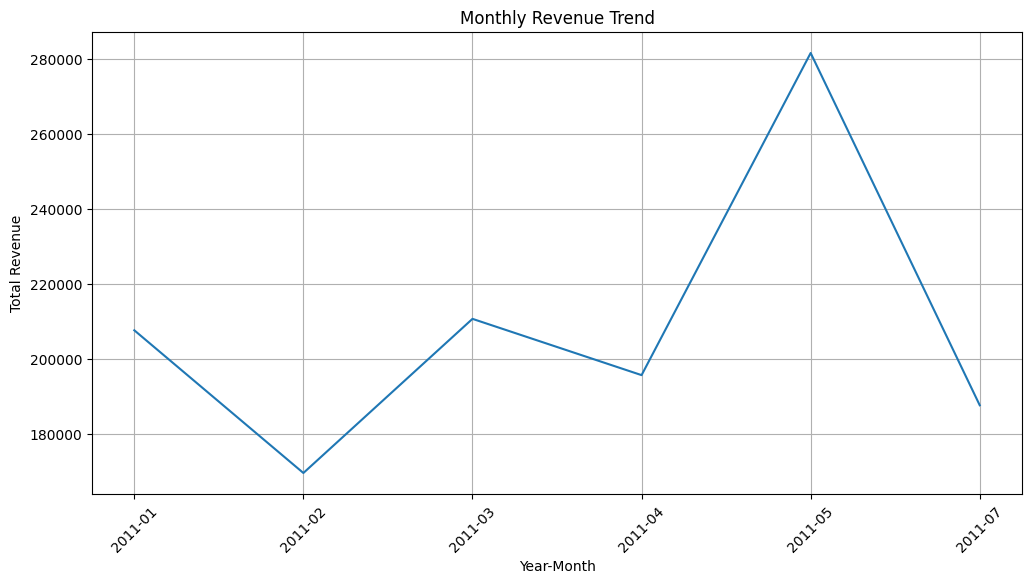

In [50]:
import matplotlib.pyplot as plt

# Convert YearMonth to string for plotting
monthly_revenue["YearMonth"] = monthly_revenue["YearMonth"].astype(str)

# Create line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Revenue"])

plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In this step, I visualized the monthly revenue to better understand how the business performs over time.
The line chart clearly shows growth patterns, seasonal fluctuations, and revenue stability across months.
This helps identify peak sales periods and possible slow seasons.

🟢 Step 8 – Customer Retention Analysis

In [51]:
# Count number of unique invoices per customer
customer_orders = df.groupby("Customer_ID")["Invoice_ID"].nunique().reset_index()

customer_orders.columns = ["Customer_ID", "Total_Orders"]

# Classify customers
customer_orders["Customer_Type"] = customer_orders["Total_Orders"].apply(
    lambda x: "Returning" if x > 1 else "One-Time"
)

customer_orders.head()

,Customer_ID,Total_Orders,Customer_Type
0,12346,1,One-Time
1,12347,2,Returning
2,12348,2,Returning
3,12350,1,One-Time
4,12352,5,Returning


In [52]:
# Count customer types
retention_summary = customer_orders["Customer_Type"].value_counts().reset_index()
retention_summary.columns = ["Customer_Type", "Count"]

# Calculate percentage
retention_summary["Percentage"] = (
    retention_summary["Count"] / retention_summary["Count"].sum() * 100
)

retention_summary

,Customer_Type,Count,Percentage
0,Returning,1414,52.061856
1,One-Time,1302,47.938144


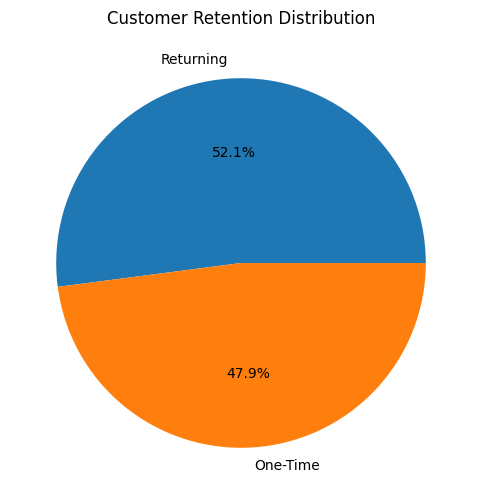

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(
    retention_summary["Count"],
    labels=retention_summary["Customer_Type"],
    autopct="%1.1f%%"
)

plt.title("Customer Retention Distribution")
plt.show()

In this step, I analyzed customer retention by identifying repeat buyers versus one-time customers.
This helps evaluate customer loyalty and long-term business sustainability.
A high percentage of returning customers indicates strong customer satisfaction and retention performance.